In [1]:
%load_ext autoreload
%autoreload 2

from plot_util import *

In [2]:
savefig = False

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
reduced chi^2: 0.83
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


/Users/ajshajib/Research/RXJ1131_KCWI/RXJ1131_KCWI_kinematics/plot_util.py:822: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(((data_v_rms - model_v_rms) / noise_v_rms)[11:34, 12:35].flatten(),
/Users/ajshajib/Research/RXJ1131_KCWI/RXJ1131_KCWI_kinematics/plot_util.py:822: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(((data_v_rms - model_v_rms) / noise_v_rms)[11:34, 12:35].flatten(),


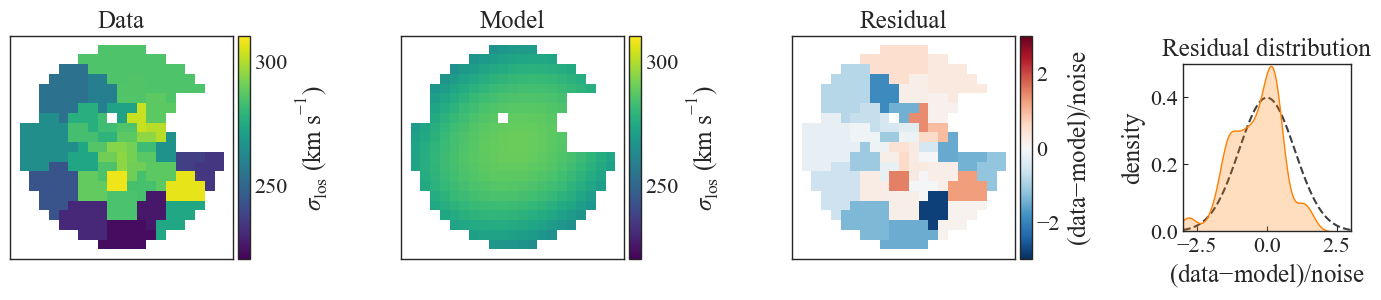

In [3]:
import matplotlib.colors as colors

pf.set_fontscale(2)

# cmap = palettable.cubehelix.perceptual_rainbow_16.mpl_colormap

vmax, vmin = 365, 55
mid = 265 #(vmax + vmin) / 2.
f = 25

vmax, vmin = 310, 220

def _forward(x):
    return x # np.arctan((x - mid)/f)


def _inverse(x):
    return x # np.tan(x)*f + mid


norm = colors.FuncNorm((_forward, _inverse), vmin=vmin, vmax=vmax)



fig, axes = plot_residual('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', shape='oblate',
                          burnin=None, snr=23, 
                          cmap='viridis', norm=norm
                         );

# ax.set_xticks([])
# ax.set_yticks([])

# ax.set_title('')

fig.tight_layout()

if savefig:
    fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/jampy_constant_elliptical.pdf', 
                bbox_inches='tight'
               )
    
fig;

In [4]:
burnin = 400
smooth = 0.2
oblate_fraction = 0.65
thin = 50

## anisotropy profiles

In [5]:
constant_bic = get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw',
                     23, 'oblate', burnin=burnin)
step_bic = get_bic('jampy', 'ifu', 'step', 'axisymmetric', 'powerlaw', 23,
              'oblate', burnin=burnin)
# print(get_bic('jampy', 'ifu', 'free_step', 'axisymmetric', 'powerlaw', 23,
#               'oblate', burnin=-100))

print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(constant_bic, step_bic, constant_bic - step_bic,
                                           np.exp(-np.abs(constant_bic - step_bic)/2)))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
67.38 71.15 -3.77 0.15


In [6]:
constant_bic = get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'prolate', burnin=burnin)
step_bic = get_bic('jampy', 'ifu', 'step', 'axisymmetric', 'powerlaw', 23,
              'prolate', burnin=burnin)
# print(get_bic('jampy', 'ifu', 'free_step', 'axisymmetric', 'powerlaw', 23,
#               'oblate', burnin=-100))

print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(constant_bic, step_bic, constant_bic - step_bic,
                                           np.exp(-np.abs(constant_bic -
                                                        step_bic)/2)))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
67.85 71.57 -3.71 0.16


Removed no burn in
D uncertainty 0.0775
Removed no burn in
D Difference: -1.05%, -0.09 sigma, D uncertainty: 0.0942
Ddt Difference: 1.95%, 0.08 sigma, D uncertainty: 0.1533


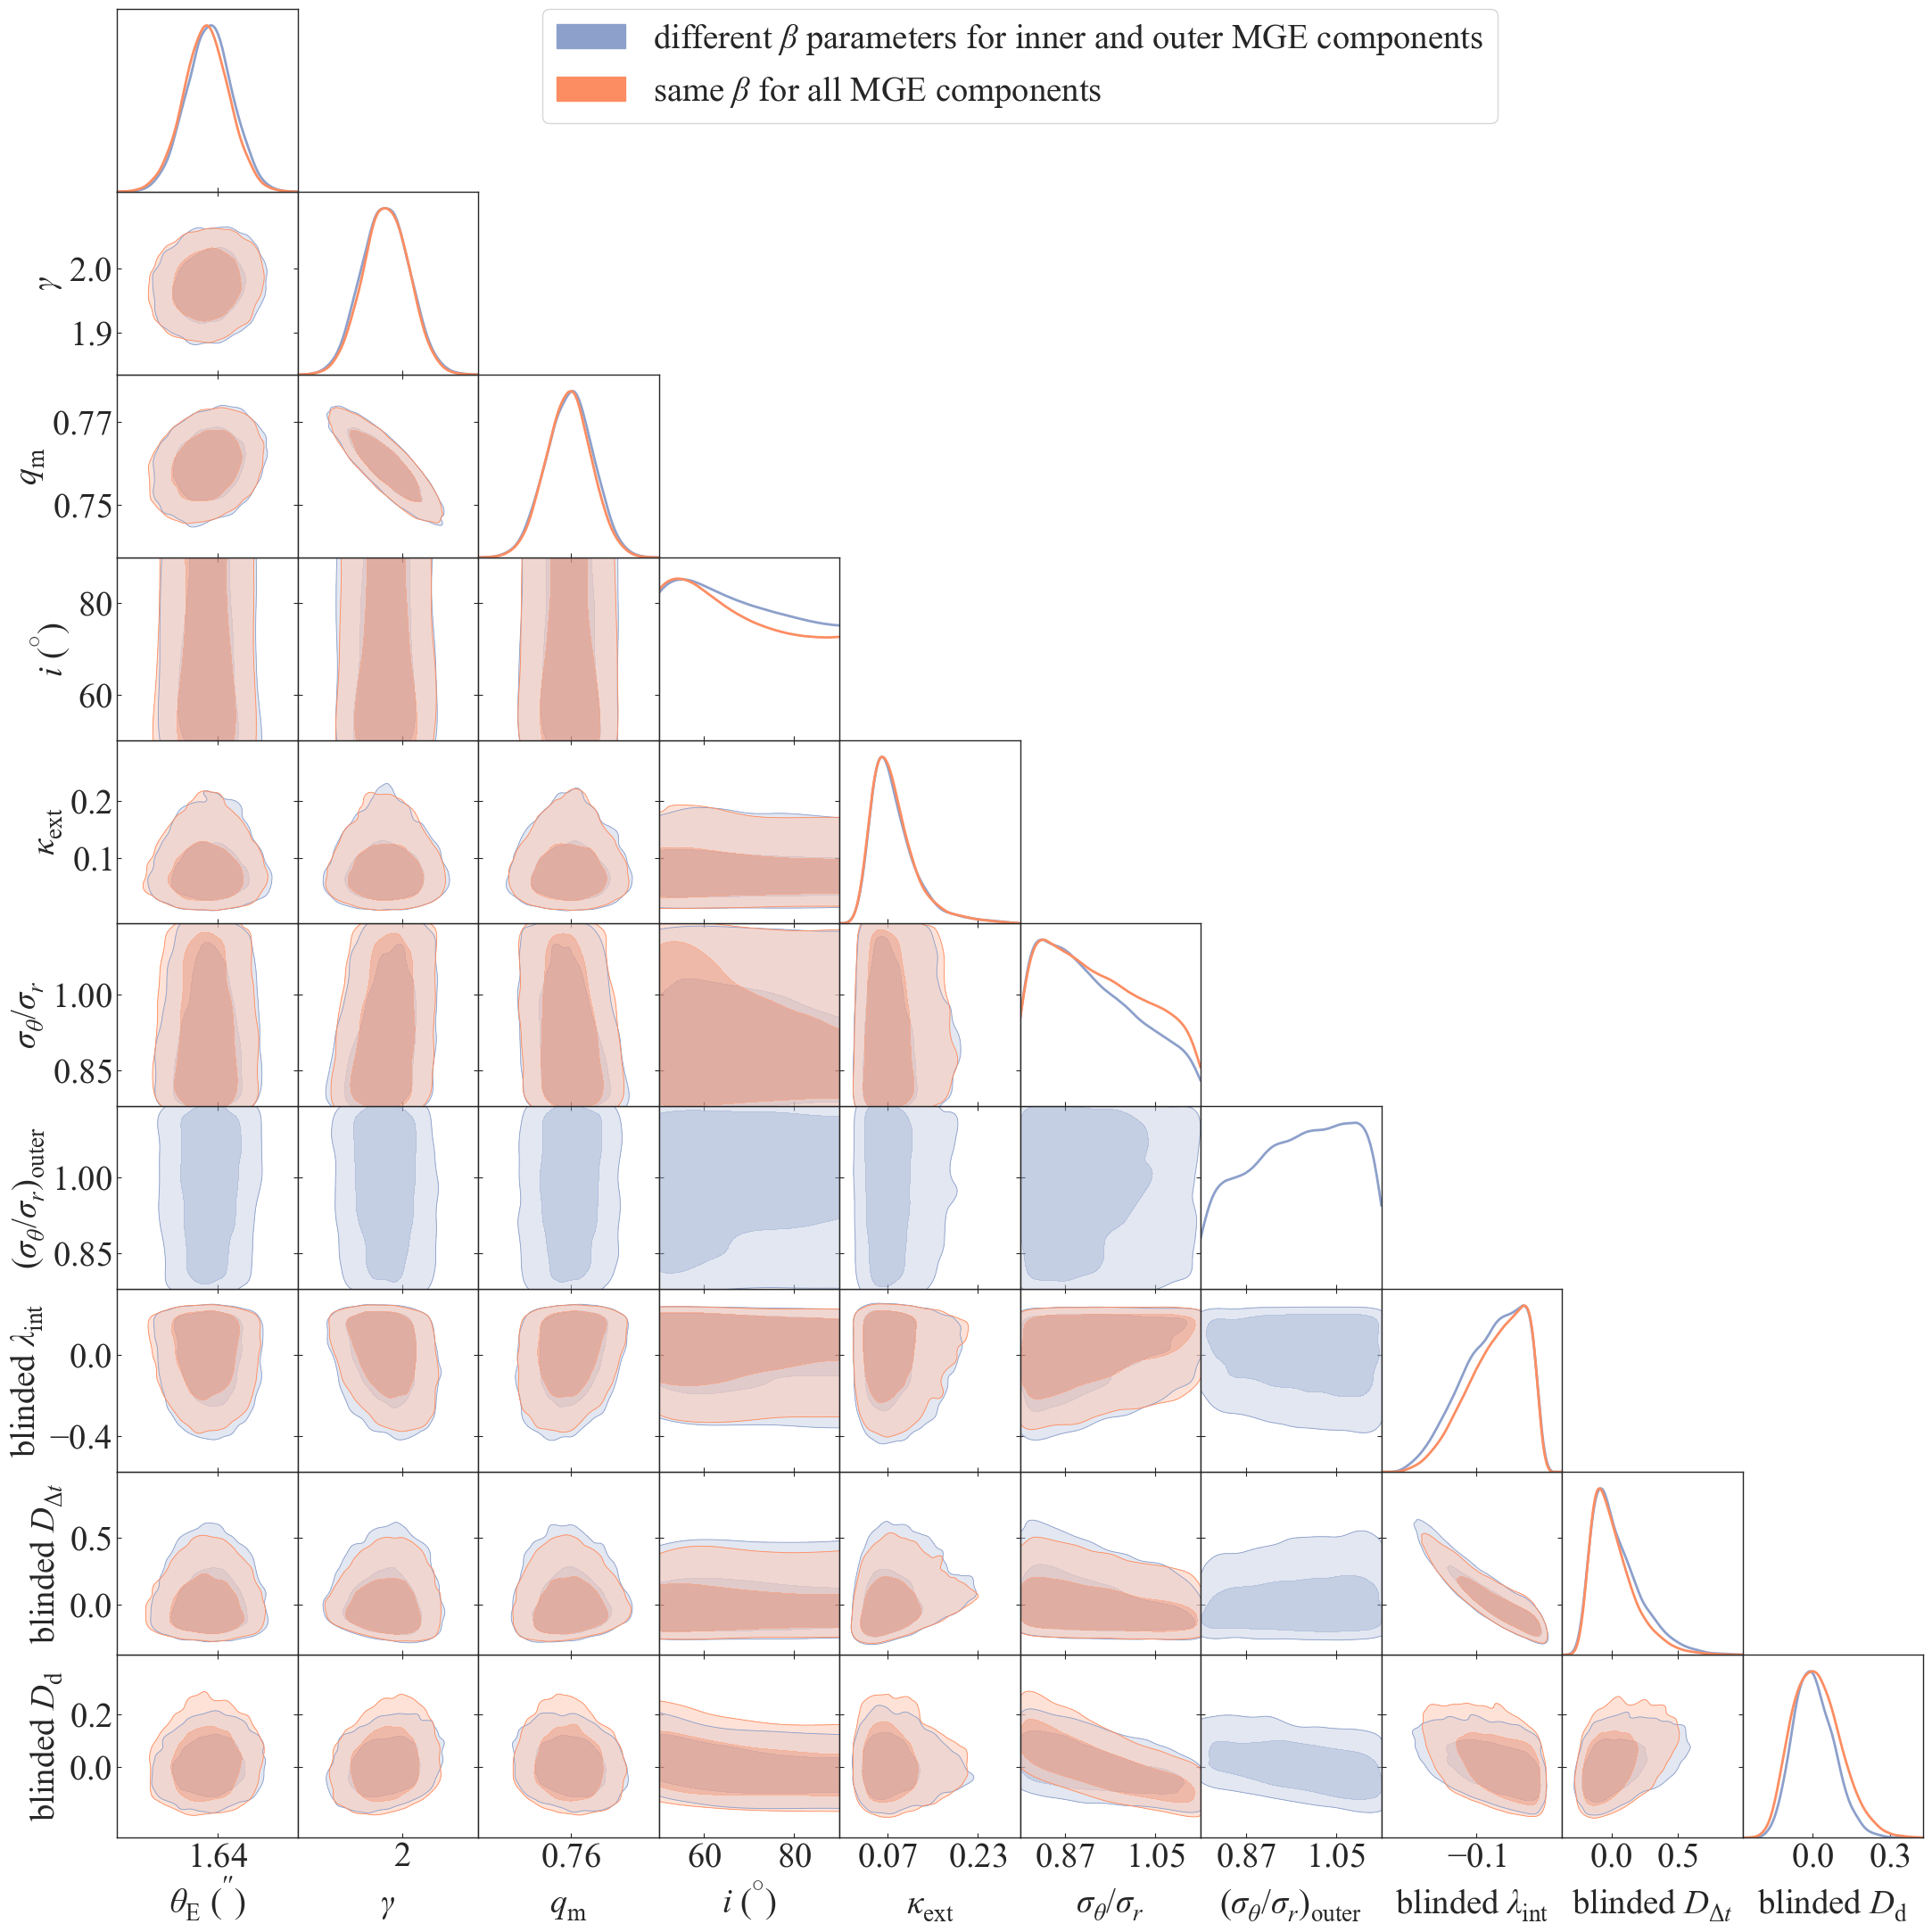

In [7]:
plot_dist(['jampy', 'jampy', 'jampy'][:2],
          ['ifu', 'ifu', 'ifu'][:2],
          ['step', 'constant'][:2],
          ['axisymmetric']*2,
          ['powerlaw']*2,
          #oblate_fractions=[1]*2,
          burnin=burnin,
          legend_labels=[#r'',
                         r'different $\beta$ parameters for inner and outer '
                         r'MGE components',
                         r'same $\beta$ for all MGE components'][:2],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}',
                           '(\\sigma_{\\theta}/\\sigma_{r})_{\\rm outer}',
                           "r_{\\rm break}\ ( '' )"][:2],
          select_indices=[[0, 1, 2, 4, 5, 8, 9, 6, 3, 7],
                          #[0, 1, 2, 3, 5, 6, 7, 8],
                          [0, 1, 2, 4, 5, 8, 6, 3, 7]],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/anisotropy_compare_axisymmetric_jam.pdf' if savefig else None,
          font_scale=1.9, blind=True, print_difference=True, smooth=smooth, thin=thin,
         )

In [8]:
pl_bic = get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'oblate', burnin=burnin)
comp_bic = get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'composite', 23,
              'oblate', burnin=burnin)
# print(get_bic('jampy', 'ifu', 'free_step', 'axisymmetric', 'powerlaw', 15, 'prolate', burnin=-100))
print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(pl_bic, comp_bic, pl_bic - comp_bic,
                                           np.exp(-np.abs (comp_bic -
                                                           pl_bic)/2)))

pl_bic = get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'prolate', burnin=burnin)
comp_bic = get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'composite', 23,
              'prolate', burnin=burnin)
# print(get_bic('jampy', 'ifu', 'free_step', 'axisymmetric', 'powerlaw', 15, 'prolate', burnin=-100))
print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(pl_bic, comp_bic, pl_bic - comp_bic,
                                           np.exp(-np.abs (comp_bic -
                                                           pl_bic)/2)))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
67.38 71.46 -4.09 0.13
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
67.85 71.23 -3.37 0.19


# power-law model

Removed no burn in
D uncertainty 0.0938


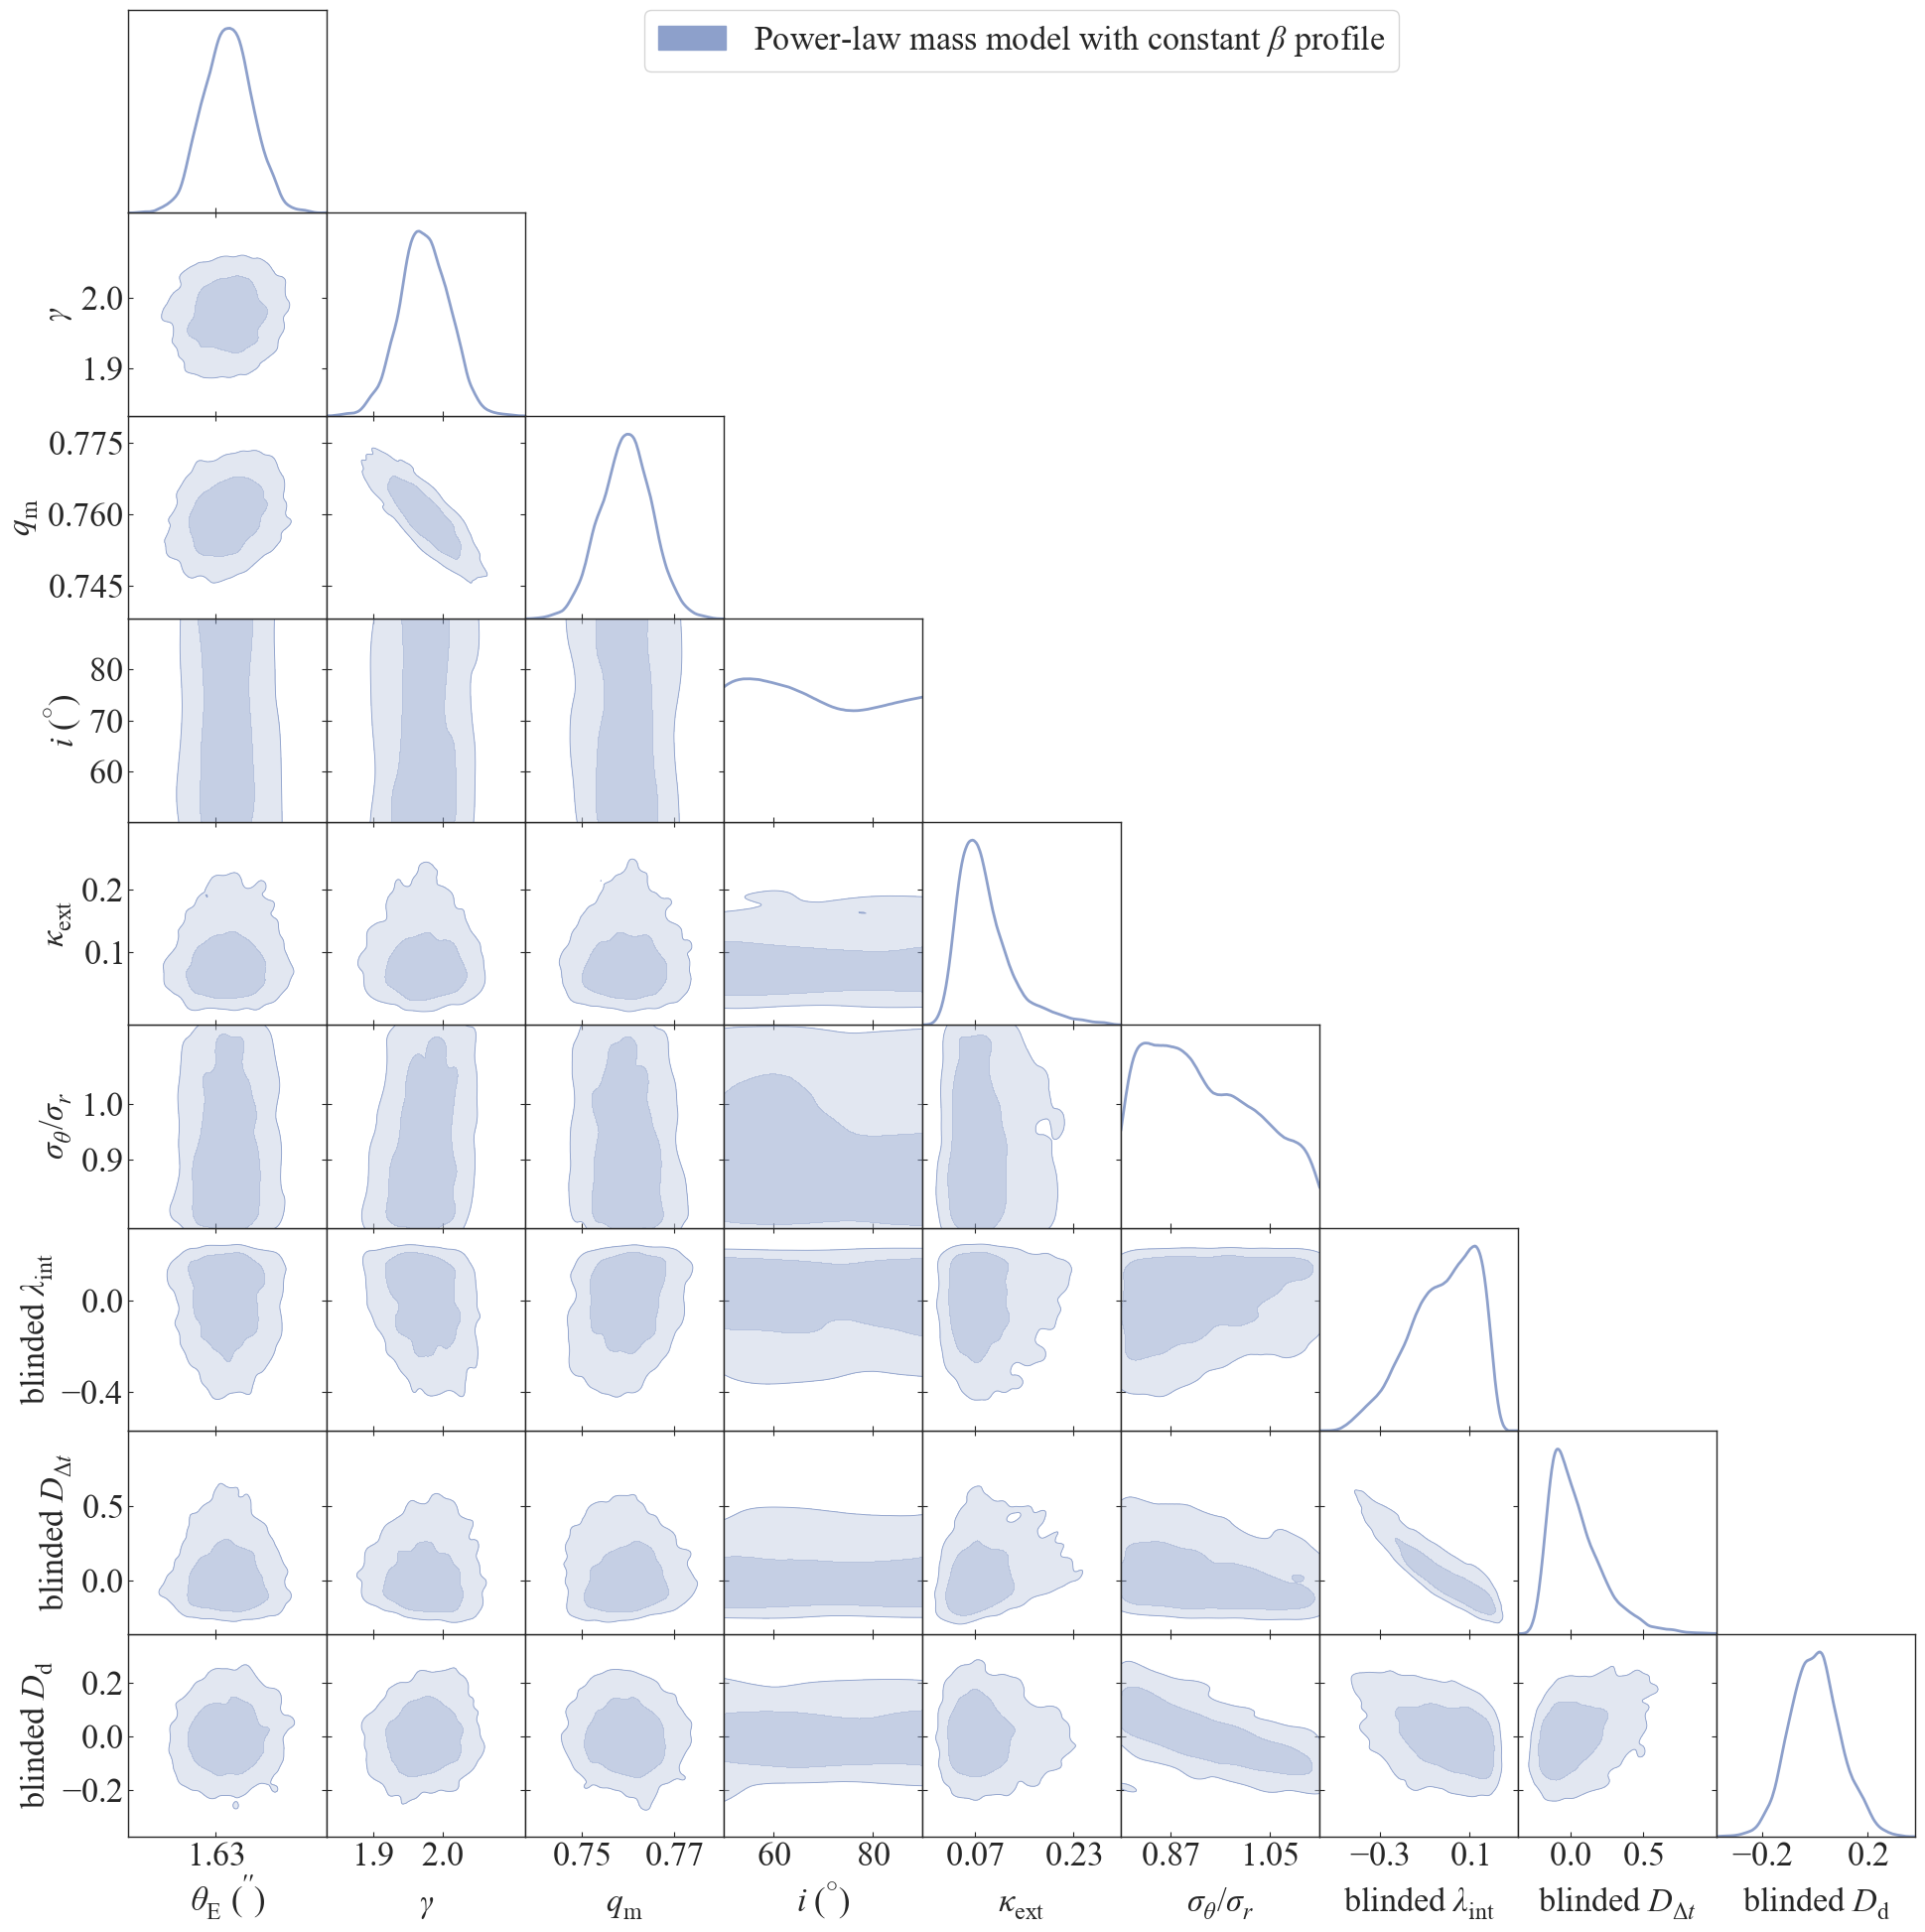

In [9]:
plot_dist(['jampy'], 
          ['ifu'], 
          ['constant'], 
          ['axisymmetric'], 
          ['powerlaw'], 
          oblate_fractions=[oblate_fraction],
          burnin=burnin,
          legend_labels=[r'Power-law mass model with constant $\beta$ '
                         r'profile'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/pl_axisymmetric_jam.pdf' if savefig else None,
          select_indices=[[0, 1, 2, 4, 5, 8, 6, 3, 7]],
          font_scale=1.7, blind=True, smooth=smooth, thin=thin,
         )

# composite model

Removed no burn in
D uncertainty 0.0818


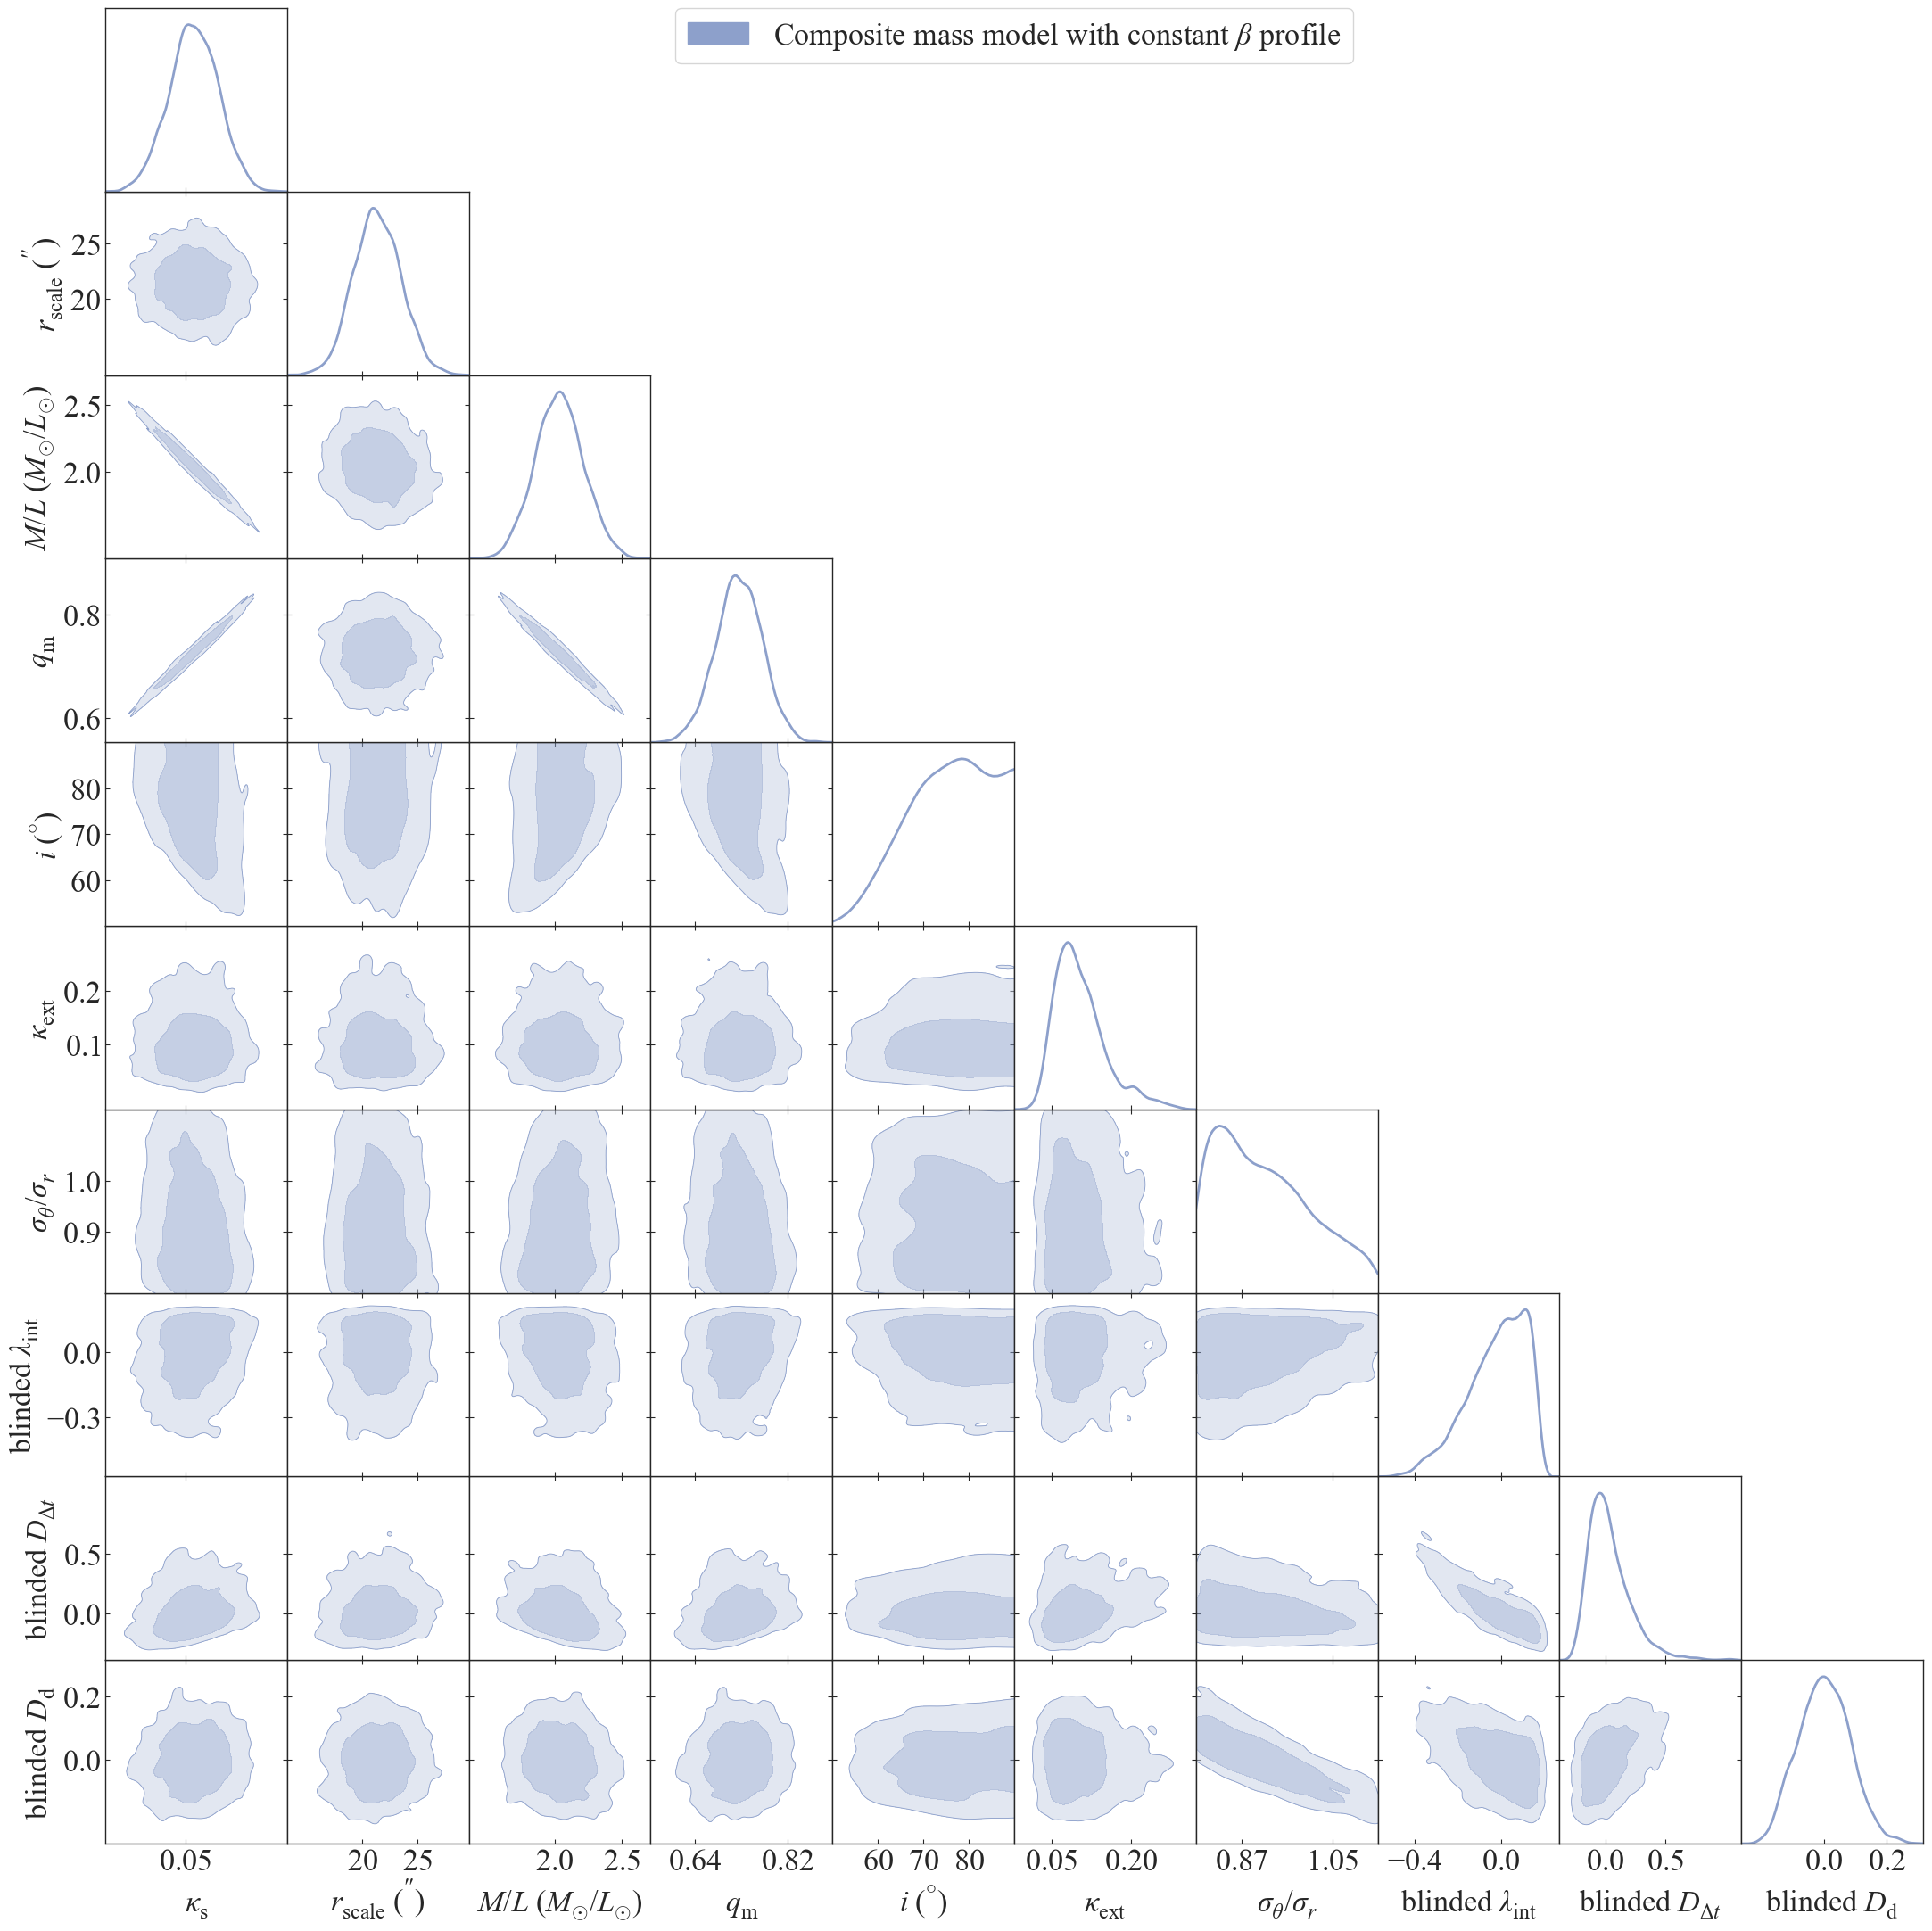

In [10]:
plot_dist(['jampy'], 
          ['ifu'], 
          ['constant'], 
          ['axisymmetric'], 
          ['composite'], 
          oblate_fractions=[oblate_fraction],
          burnin=burnin,
          legend_labels=[r'Composite mass model with constant $\beta$ '
                         r'profile'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/comp_axisymmetric_jam.pdf' if savefig else None,
          select_indices=[[0, 1, 2, 3, 5, 6, 9, 7, 4, 8],
                          #[0, 1, 2, 3, 4, 6, 7, 8]
                         ],
          font_scale=1.7, blind=False, smooth=smooth, thin=thin,
         )

Removed no burn in
D uncertainty 0.0958
Removed no burn in
D Difference: -1.53%, -0.12 sigma, D uncertainty: 0.0838
Ddt Difference: 1.38%, 0.06 sigma, D uncertainty: 0.1570


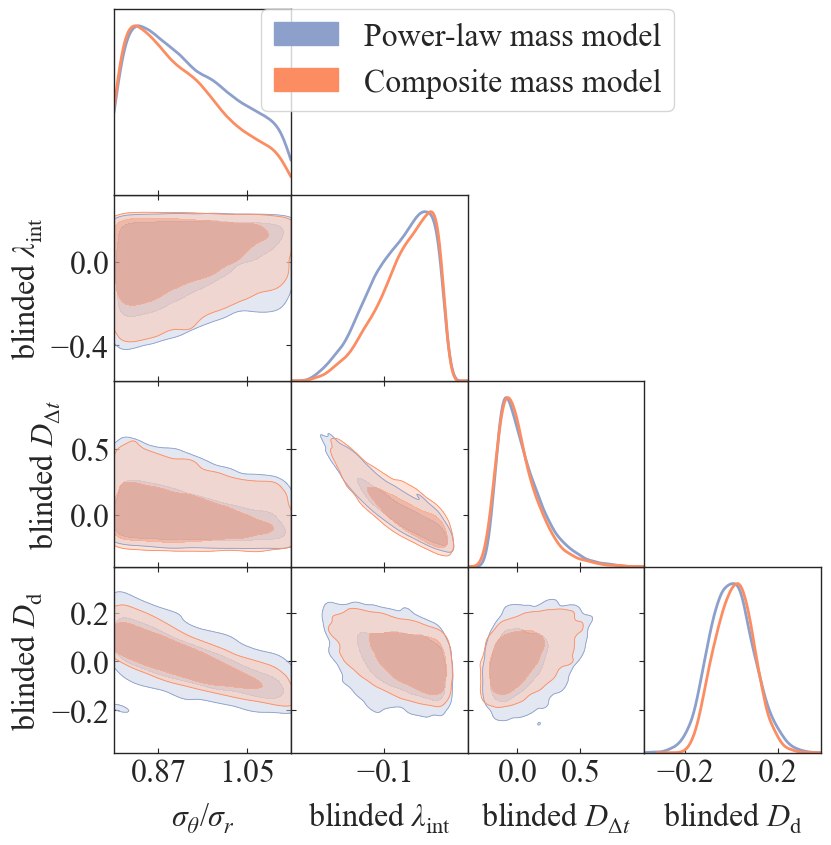

In [18]:
plot_dist(['jampy']*2, 
          ['ifu']*2, 
          ['constant']*2, 
          ['axisymmetric']*2, 
          ['powerlaw', 'composite'], 
          oblate_fractions=[oblate_fraction]*2,
          burnin=burnin,
          legend_labels=[r'Power-law mass model', r'Composite mass model'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/comp_vs_pl_axisymmetric_jam.pdf' if savefig else None,
          font_scale=1.6,
          select_indices=[[8, 6, 3, 7], [9, 7, 4, 8]],
          blind=True, print_difference=True, smooth=smooth
         )

Removed no burn in
D uncertainty 0.0791
Removed no burn in
D Difference: 2.02%, 0.16 sigma, D uncertainty: 0.0957
Ddt Difference: -3.07%, -0.12 sigma, D uncertainty: 0.1808
Removed no burn in
D Difference: 3.57%, 0.30 sigma, D uncertainty: 0.0899
Ddt Difference: 0.13%, 0.01 sigma, D uncertainty: 0.1562


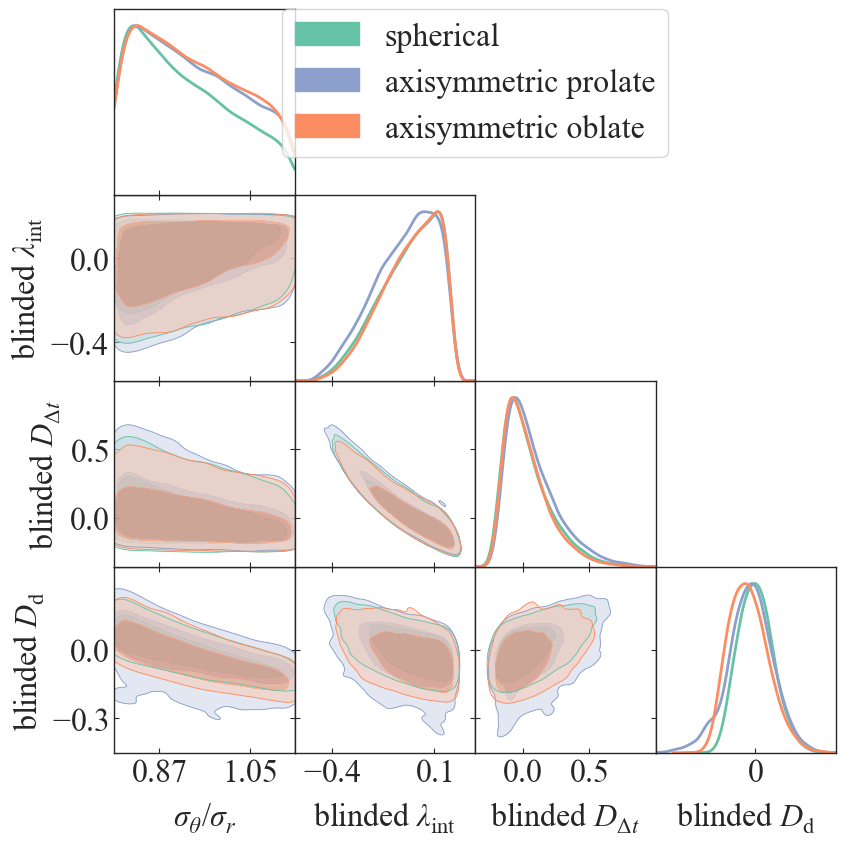

In [12]:
plot_dist(['jampy', 'jampy', 'jampy'],
          ['ifu', 'ifu', 'ifu'],
          ['constant', 'constant', 'constant'],
          ['axisymmetric', 'axisymmetric', 'spherical'][::-1],
          ['powerlaw', 'powerlaw', 'powerlaw'],
          snrs=[23, 23, 23],
          shapes=['oblate', 'prolate', 'oblate'],
          burnin=burnin,
          legend_labels=[r'axisymmetric oblate', r'axisymmetric prolate',
                         'spherical'][::-1],
          colors=[pf.cb2_emerald, pf.cb2_blue, pf.cb2_orange],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/prolate_vs_oblate_compare.pdf' if savefig else None,
          font_scale=1.6,
          select_indices=[[8, 6, 3, 7]]*3, blind=True,
          print_difference=True, smooth=smooth, thin=thin,
         )

Removed no burn in
D uncertainty 0.0938
Removed no burn in
D Difference: -2.61%, -0.21 sigma, D uncertainty: 0.0812
Ddt Difference: 2.03%, 0.09 sigma, D uncertainty: 0.1651


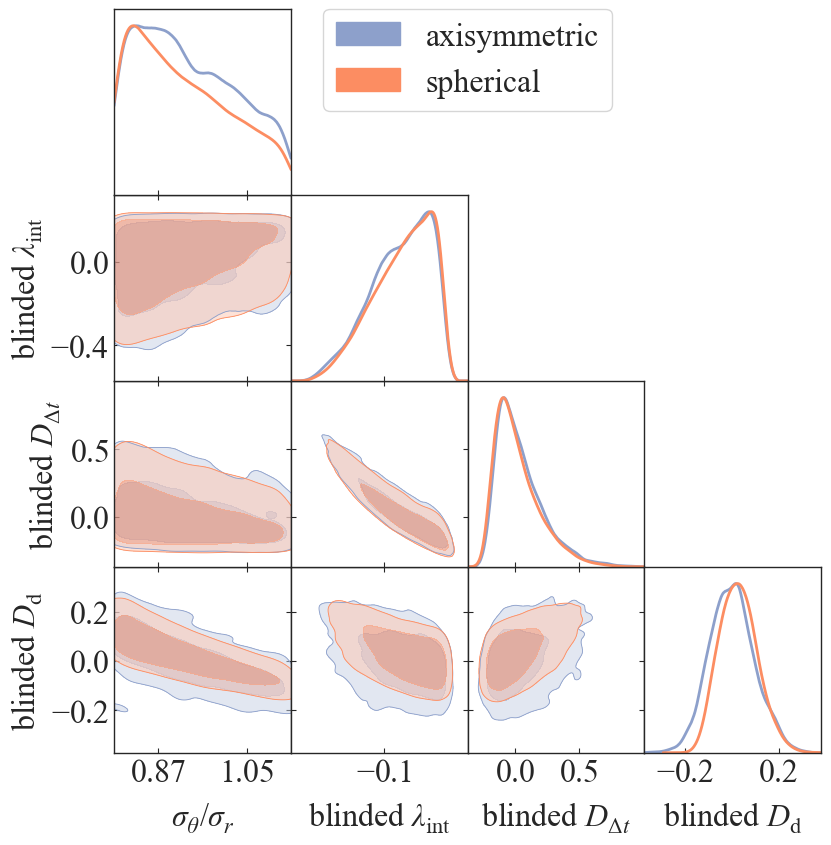

In [13]:
plot_dist(['jampy', 'jampy'], 
          ['ifu', 'ifu'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'spherical'], 
          ['powerlaw', 'powerlaw'],
          oblate_fractions=[oblate_fraction, None],
          burnin=burnin,
          legend_labels=[r'axisymmetric', r'spherical'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/axisymmetric_vs_spherical_compare.pdf' if savefig else None,
          font_scale=1.6,
          select_indices=[[8, 6, 3, 7]]*2, blind=True,
          print_difference=True, smooth=smooth, thin=thin,
         )

In [14]:
# # OM anisotropy
# plot_dist(['jampy', 'jampy'], 
#           ['ifu', 'single_slit'], 
#           ['om', 'om'], 
#           ['spherical', 'spherical'], 
#           ['powerlaw', 'powerlaw'], 
#           oblate_fractions=[.80, .80],
#           burnin=-50, 
#           legend_labels=[r'spatially resolved velocity dispersion', r'integrated velocity dispersion'],
#           ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
#           save_fig=None, #'/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/ifu_vs_slit_compare.pdf' if savefig else None,
#           font_scale=1.5,
#           select_indices=[[-4, -2, -1]]*2, blind=True, print_difference=True
#          )

Removed no burn in
D uncertainty 82.7959
Removed no burn in
D Difference: -2156.64%, -0.13 sigma, D uncertainty: 139.7408
Ddt Difference: -37142.30%, -0.45 sigma, D uncertainty: 733.5840


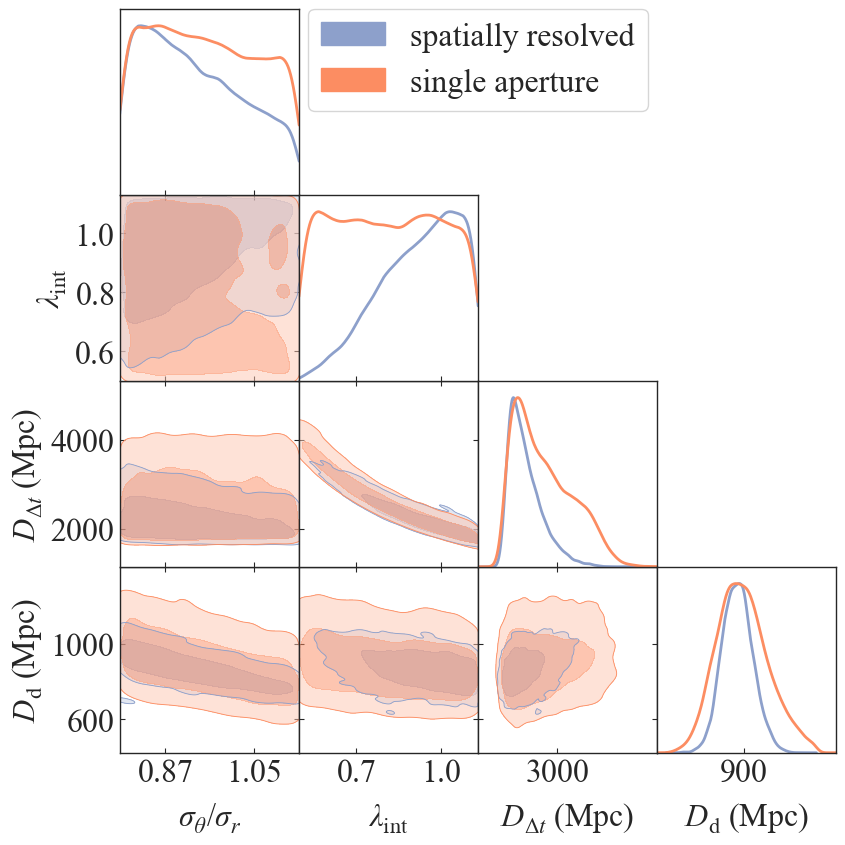

In [28]:
pf.set_fontscale(2)

plot_dist(['jampy', 'jampy'], 
          ['ifu', 'single_slit'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'axisymmetric'], 
          ['powerlaw', 'powerlaw'], 
          oblate_fractions=[oblate_fraction, oblate_fraction],
          burnin=burnin,
          legend_labels=['spatially resolved', 'single aperture'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/ifu_vs_slit_compare.pdf' if savefig else None,
          font_scale=1.6, blind=False,
          select_indices=[[8, 6, 3, 7]]*2, print_difference=True, smooth=0.15,
          thin=1,
         )

## SNR compare

Removed no burn in
D uncertainty 0.0953
Removed no burn in
D Difference: 0.21%, 0.02 sigma, D uncertainty: 0.0947
Ddt Difference: -0.28%, -0.01 sigma, D uncertainty: 0.1682


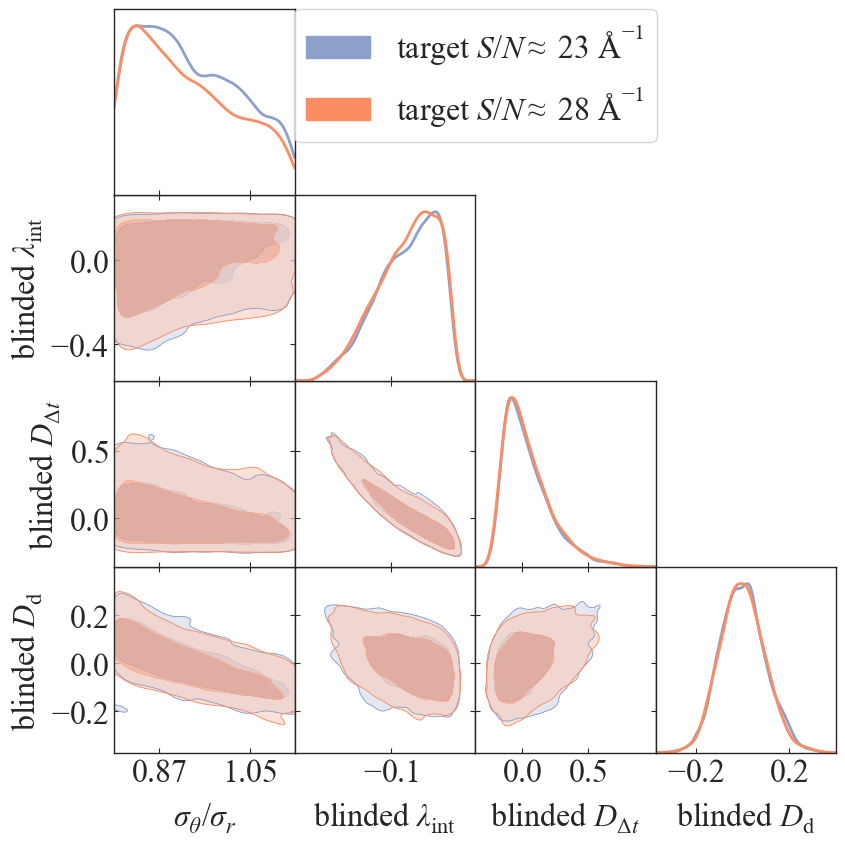

In [33]:
plot_dist(['jampy', 'jampy'],
          ['ifu', 'ifu'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'axisymmetric'], 
          ['powerlaw', 'powerlaw'], 
          oblate_fractions=[oblate_fraction, oblate_fraction],
          snrs=[23, 28],
          burnin=burnin,
          legend_labels=[r'target $S/N \approx$ 23 $\rm\AA^{-1}$',
                         r'target $S/N \approx$ 28 $\rm\AA^{-1}$'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi'
                   '/figures/snr_compare.pdf' if savefig else None,
          font_scale=1.6,
          select_indices=[[8, 6, 3, 7]]*2, blind=True,
          print_difference=True, smooth=smooth, thin=50,
         )